In [136]:
import yfinance as yf

data = yf.download(['AAPL','AMZN','NVDA','ADBE','MSFT','EPAM'],
                   start = '2019-01-01',
                   end = '2021-05-10'
                  )

closeData = data.Close

import matplotlib.pyplot as plt

[*********************100%***********************]  6 of 6 completed


In [137]:
dCloseData = closeData.pct_change()

plMean = dCloseData.mean()

cov = dCloseData.cov()

import numpy as np

cnt = len(dCloseData.columns)

def randPortf():
    res = np.exp(np.random.randn(cnt))
    res = res / res.sum()
    return res

r = randPortf()

In [138]:
def plPortf(r):
    return np.matmul(plMean.values,r)

r = randPortf()
d = plPortf(r)

In [139]:
def riskPortf(r):
    return np.sqrt(np.matmul(np.matmul(r,cov.values),r))

r = randPortf()
rs = riskPortf(r)

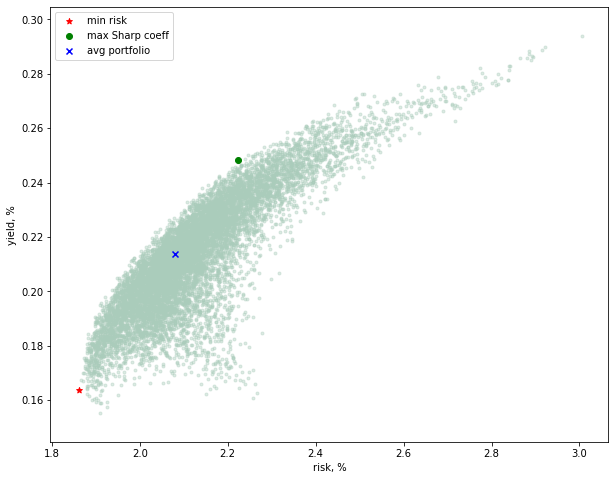

In [140]:
N = 10000

risk = np.zeros(N)
pl = np.zeros(N)
portf = np.zeros((N,cnt))

for n in range(N):
    r = randPortf()

    portf[n,:] = r
    risk[n] = riskPortf(r)
    pl[n] = plPortf(r)

plt.figure(figsize=(10,8))

plt.scatter(risk*100,pl*100,c='#AACCBB',marker='.',alpha = 0.4)
plt.xlabel('risk, %')
plt.ylabel('yield, %')

min_risk = np.argmin(risk)
plt.scatter([(risk[min_risk]) * 100],[(pl[min_risk])*100],c='r',marker='*',label='min risk')

maxSharpKoef = np.argmax(pl/risk)
plt.scatter([risk[maxSharpKoef]*100],[pl[maxSharpKoef]*100],c='g',marker='o',label='max Sharp coeff')

r_mean = np.ones(cnt)/cnt
risk_mean = riskPortf(r_mean)
pl_mean = plPortf(r_mean)
plt.scatter([risk_mean*100], [pl_mean*100],c='b',marker='x',label='avg portfolio')

plt.legend()

plt.show()

In [141]:
import pandas as pd

print('---------- Max Sharp coeff ----------')
print()
print("risk = %1.2f%%" % (float(risk[maxSharpKoef])*100.))
print("yield = %1.2f%%" % (float(pl[maxSharpKoef])*100.)) 
print()
print(pd.DataFrame([portf[maxSharpKoef]*100],columns=dCloseData.columns,index=['share, %']).T)
print()

print('---------- Min Risk ----------')
print()
print("risk = %1.2f%%" % (float(risk[min_risk])*100.))
print("yield = %1.2f%%" % (float(pl[min_risk])*100.)) 
print()
print(pd.DataFrame([portf[min_risk]*100],columns=dCloseData.columns,index=['share, %']).T)

---------- Max Sharp coeff ----------

risk = 2.22%
yield = 0.25%

       share, %
AAPL  43.332415
ADBE   0.721444
AMZN   2.748359
EPAM  38.982180
MSFT   2.933720
NVDA  11.281882

---------- Min Risk ----------

risk = 1.86%
yield = 0.16%

       share, %
AAPL   2.226728
ADBE   3.888466
AMZN  62.203299
EPAM   1.201929
MSFT  29.141187
NVDA   1.338392
